## Test pitch quality metric against pitchingbot and pitching+ metrics on fangraphs using 2023 split halves
Note: no 2023 data was used to train my metric

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [3]:
first_half = pd.read_csv('other_data/first_half_metrics.csv')
second_half = pd.read_csv('other_data/second_half_metrics.csv')

In [4]:
pitch_model_predictions = pd.read_csv('other_data/model_predictions.csv')
pitch_model_predictions['game_date'] = pd.to_datetime(pitch_model_predictions['game_date'])

C:\Users\wampl\AppData\Local\Temp\ipykernel_13932\842735130.py:1: DtypeWarning: Columns (116) have mixed types. Specify dtype option on import or set low_memory=False.
  pitch_model_predictions = pd.read_csv('other_data/model_predictions.csv')


In [5]:
pitch_model_predictions['half'] = np.where(pitch_model_predictions['game_date'] < '2023-07-11', 'first half', 'second half')

In [15]:
pitch_scores_by_pitch_half = pitch_model_predictions \
    .groupby(['player_name', 'pitcher', 'pitch_type', 'half'], as_index=False)['xgb_preds'] \
    .agg(['mean', 'count'])

In [16]:
pitch_scores_by_pitch_half.loc[pitch_scores_by_pitch_half['count']>100].nsmallest(25, 'mean')

,player_name,pitcher,pitch_type,half,mean,count
5165,"deGrom, Jacob",594798,SL,first half,-0.025282,167
4960,"Williams, Devin",642207,CH,first half,-0.022584,304
4002,"Santos, Gregory",666619,SL,first half,-0.021695,349
3079,"Miller, Bobby",676272,SL,first half,-0.021494,176
2187,"Jax, Griffin",643377,ST,first half,-0.020963,339
75,"Alcantara, Sandy",645261,CH,second half,-0.020109,279
4159,"Sims, Lucas",608371,SL,second half,-0.020063,205
1823,"Harvey, Hunter",640451,FS,first half,-0.019560,117
3627,"Pressly, Ryan",519151,SL,second half,-0.019173,122
5049,"Winn, Keaton",676775,FS,second half,-0.018794,120


In [17]:
pitch_scores_by_pitcher_half = pitch_model_predictions \
    .groupby(['player_name', 'pitcher', 'half'], as_index=False)['xgb_preds'] \
    .agg(['mean', 'count'])

In [18]:
pitch_scores_by_pitcher_half.loc[pitch_scores_by_pitcher_half['count']>100].nsmallest(25, 'mean')

,player_name,pitcher,half,mean,count
1342,"deGrom, Jacob",594798,first half,-0.015963,442
565,"Jax, Griffin",643377,first half,-0.014086,560
23,"Alcantara, Sandy",645261,second half,-0.013669,1026
1055,"Scott, Tanner",656945,second half,-0.013549,437
80,"Bautista, Félix",642585,second half,-0.013413,285
1225,"Vesia, Alex",681911,second half,-0.013339,327
479,"Helsley, Ryan",664854,first half,-0.013027,419
214,"Clase, Emmanuel",661403,first half,-0.011792,650
1289,"Williams, Devin",642207,first half,-0.011749,553
79,"Bautista, Félix",642585,first half,-0.011731,699


In [19]:
first_half_pred = pitch_scores_by_pitcher_half[pitch_scores_by_pitcher_half['half']=='first half']

In [20]:
second_half_pred = pitch_scores_by_pitcher_half[pitch_scores_by_pitcher_half['half']=='second half']

In [21]:
first_half = first_half.merge(first_half_pred, left_on='MLBAMID', right_on='pitcher', how='left')
second_half = second_half.merge(second_half_pred, left_on='MLBAMID', right_on='pitcher', how='left')

In [57]:
first_half[['ERA', 'FIP', 'xFIP', 'SIERA', 'botERA', 'Pitching+', 'pitch_score']].corr()

,ERA,FIP,xFIP,SIERA,botERA,Pitching+,pitch_score
ERA,1.000000,0.692828,0.526362,0.553805,0.329677,-0.370031,0.179047
FIP,0.692828,1.000000,0.788027,0.771558,0.505739,-0.505073,0.271758
xFIP,0.526362,0.788027,1.000000,0.933070,0.516102,-0.533723,0.323067
SIERA,0.553805,0.771558,0.933070,1.000000,0.539595,-0.573944,0.310528
botERA,0.329677,0.505739,0.516102,0.539595,1.000000,-0.824954,0.406477
Pitching+,-0.370031,-0.505073,-0.533723,-0.573944,-0.824954,1.000000,-0.310620
pitch_score,0.179047,0.271758,0.323067,0.310528,0.406477,-0.310620,1.000000


In [22]:
full = pd.merge(first_half, second_half, on='MLBAMID', suffixes=('_1H', '_2H'))

In [25]:
full = full.rename(columns={'mean_1H': 'pitch_score_1H', 'mean_2H': 'pitch_score_2H'})

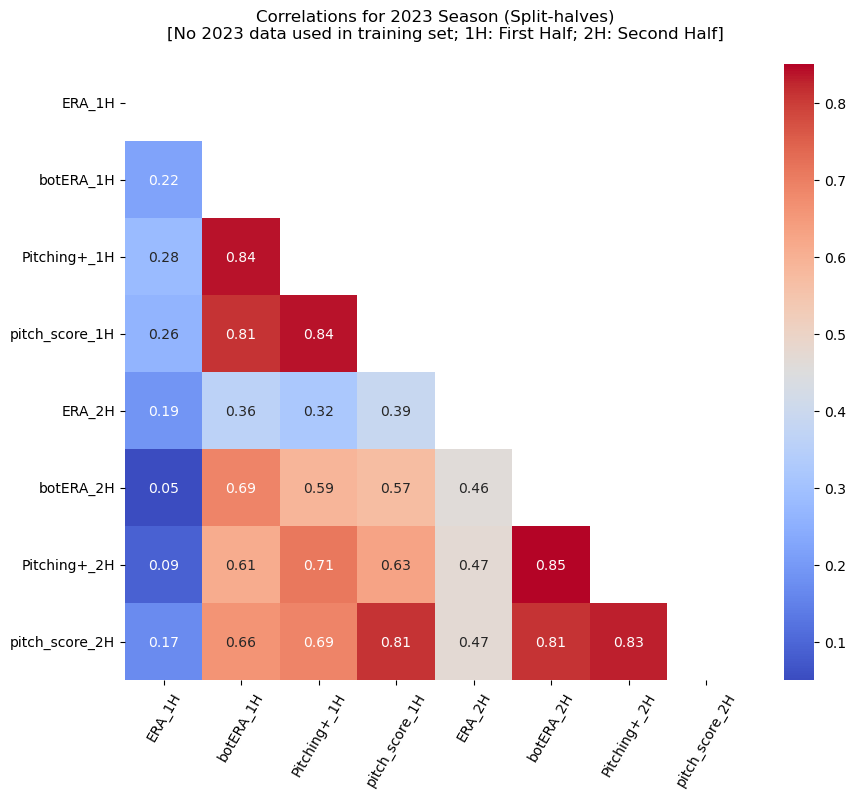

In [27]:
corr = full[['ERA_1H', 'botERA_1H', 'Pitching+_1H', 'pitch_score_1H', 'ERA_2H','botERA_2H', 'Pitching+_2H', 'pitch_score_2H']].corr().abs().round(2)
mask = np.triu(np.ones_like(corr, dtype=bool))  # Create a mask for the upper triangle
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")  # Apply the mask to the heatmap
plt.xticks(rotation=60)
plt.title(
    """Correlations for 2023 Season (Split-halves)
    [No 2023 data used in training set; 1H: First Half; 2H: Second Half]
    """
)
plt.show()


In [61]:
full.head()

,Name_1H,Team_1H,IP_1H,ERA_1H,xERA_1H,FIP_1H,xFIP_1H,SIERA_1H,Pitching+_1H,botERA_1H,...,xFIP_2H,SIERA_2H,Pitching+_2H,botERA_2H,NameASCII_2H,PlayerId_2H,player_name_2H,pitcher_2H,pitch_score_2H,count_2H
0,Craig Kimbrel,PHI,37.0,3.405406,NaN,3.230406,3.044281,2.504763,117.910250,2.760223,...,4.490646,4.092222,109.874036,3.195468,Craig Kimbrel,6655,"Kimbrel, Craig",518886,0.008848,344
1,Emmanuel Clase,CLE,42.2,3.375000,NaN,2.929308,3.487389,3.530839,116.125895,2.578961,...,3.318569,3.249186,116.839687,2.423162,Emmanuel Clase,21032,"Clase, Emmanuel",661403,-0.013322,307
2,Spencer Strider,ATL,104.2,3.439490,NaN,2.817943,2.868963,2.730187,113.985725,2.988665,...,3.013132,2.975096,108.731738,3.291266,Spencer Strider,27498,"Strider, Spencer",675911,-0.002622,914
3,Zack Wheeler,PHI,104.1,4.054313,NaN,2.806954,3.512969,3.535443,110.994539,2.836520,...,3.411229,3.402545,114.014695,2.290358,Zack Wheeler,10310,"Wheeler, Zack",554430,-0.001432,981
4,Bobby Miller,LAD,44.0,4.500000,NaN,3.689251,3.979135,4.204794,110.119674,2.841754,...,4.025678,4.135876,109.489293,3.273506,Bobby Miller,27483,"Miller, Bobby",676272,0.005648,788


In [29]:
import plotly.express as px

In [32]:
px.scatter(full, x='pitch_score_1H', y='Pitching+_1H', color='ERA_2H', hover_name='Name_1H', hover_data=['IP_1H', 'IP_2H'], trendline='ols')

In [34]:
px.scatter(full, x='pitch_score_1H', y='botERA_1H', color='ERA_2H', hover_name='Name_1H', hover_data=['IP_1H', 'IP_2H'], trendline='ols')

In [ ]:
px.scatter(full, x='Pitching+_1H', y='ERA_2H', hover_name='Name_1H', trendline='ols')